In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle

import sys
sys.path.append('..')

import mesh_process

import seaborn as sns
sns.set_style('darkgrid')

In [2]:
with open(b'../data/dense_slices_dict.pickle', 'rb') as slice_pickle:
    slices = pickle.load(slice_pickle)

In [47]:
import pickle
import colorsys

with open(b'../models/AdaBoosted_clf.pickle', 'rb') as ada_pickle:
    AdaBoost_clf = pickle.load(ada_pickle)
    
    
class_labels = ['Shale', 'Heterolithic', 'Sand']
label_colors = ['blue', 'green', 'yellow']
cmap_classes = matplotlib.colors.ListedColormap(label_colors)


def rgb_to_classes(rgb):
    X_hsv = np.apply_along_axis(lambda c: np.array(colorsys.rgb_to_hsv(*tuple(c/255.0))),
                                1, rgb)
    y_preds = AdaBoost_clf.predict(X_hsv)
    return y_preds, np.bincount(y_preds)

In [72]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax), divider

n_show = 10  # number of slices to show in each fig
alphas = np.geomspace(0.01, 0.5, n_show)  # transparencies of previous slices

dist_keys = np.array(list(slices.keys()))
cumdist = np.cumsum(dist_keys)
counts = np.array([0,0,0])

x_lims, y_lims = (0,145), (1470,1615)

for i in range(n_show, dist_keys.size):
    fig, ax = plt.subplots(figsize=(30,30))
    ax.set_aspect('equal')
    ax.set_xlim(*x_lims); ax.set_ylim(*y_lims)
    ax.tick_params(labelsize=20)
    
    title_str = 'Weathering Profile Sequence with Color Classification \n[Cumulative Distance = {:3.1f}]'.format(dist_keys[i])
    ax.set_title(title_str, size=45)
    ax.set_xlabel('Recess', size=35)
    ax.set_ylabel('Elevation', size=35)
    
    for k, a in zip(dist_keys[i-n_show:i], alphas):
        slc = slices[k]
        z = slc['zs'][0]; d = slc['ds'][0];
        predictions, bin_cnt = rgb_to_classes(slc['clr']);
        sct = ax.scatter(d, z, c=predictions, cmap=cmap_classes, s=50, alpha=a)
    
    # colorbar
    cb, divider = colorbar(sct)
    loc = np.arange(0.35, 2.35, 2/3)
    cb.set_ticks(loc)
    cb.set_ticklabels(class_labels)
    cb.ax.tick_params(labelsize=25)
    
    # cumulative distribution barchart
    current_fracs = bin_cnt / bin_cnt.sum()
    bax = divider.append_axes("bottom", size="10%", pad=1.25)
    bax.set_ylabel('Current:', size=45, rotation=0, labelpad=100)
    bax.set_xlim(0,1); bax.set_yticks([])
    left = 0
    for frac, clr in zip(current_fracs, label_colors):
        bax.barh(0, frac, color=clr, left=left)
        left+=frac
    
    counts += bin_cnt
    cum_fracs = counts / counts.sum()
    print(counts, cum_fracs)
    cbax = divider.append_axes("bottom", size="10%", pad=1.0)
    cbax.set_ylabel('Cumulative:', size=45, rotation=0, labelpad=145)
    cbax.set_xlim(0,1); cbax.set_yticks([])
    left = 0
    for frac, clr in zip(cum_fracs, label_colors):
        cbax.barh(0, frac, color=clr, left=left)
        left+=frac
    
    plt.savefig('../data/slice_figs/{0:03d}.png'.format(int(dist_keys[i])))
    plt.close()

[ 917 1970 1638] [ 0.20265193  0.43535912  0.36198895]
[2103 3718 3404] [ 0.22796748  0.40303523  0.36899729]
[3431 5229 5150] [ 0.24844316  0.37863867  0.37291818]
[4965 6534 6602] [ 0.27429424  0.36097453  0.36473123]
[6483 7890 8274] [ 0.28626308  0.34839052  0.3653464 ]
[ 7794  9474 10077] [ 0.28502468  0.34646188  0.36851344]
[ 9097 10881 11640] [ 0.28771586  0.34413941  0.36814473]
[10841 11910 12891] [ 0.30416363  0.33415633  0.36168004]
[13126 12934 13821] [ 0.32912916  0.32431484  0.346556  ]
[15878 13920 14577] [ 0.35781408  0.31369014  0.32849577]
[18276 15335 15417] [ 0.37276658  0.31278045  0.31445297]
[20282 17169 16476] [ 0.37610103  0.31837484  0.30552413]
[22250 19105 17455] [ 0.37833702  0.32485972  0.29680326]
[23890 21033 18802] [ 0.37489211  0.33005885  0.29504904]
[25697 22925 20135] [ 0.37373649  0.3334206   0.29284291]
[27227 25076 21541] [ 0.36870971  0.33958074  0.29170955]
[28501 27314 23160] [ 0.36088636  0.34585628  0.29325736]
[29636 29335 24833] [ 0.35363

[140372 246453 320006] [ 0.19859344  0.34867316  0.4527334 ]
[141201 248483 322924] [ 0.19814681  0.34869522  0.45315798]
[142132 250465 326499] [ 0.19765372  0.34830537  0.45404091]
[142188 251783 330035] [ 0.19639064  0.34776369  0.45584567]
[142221 253159 333107] [ 0.19522792  0.34751341  0.45725867]
[142235 254339 336712] [ 0.19396934  0.3468483   0.45918237]
[142290 255297 341060] [ 0.192636    0.34562788  0.46173612]
[142426 256198 344316] [ 0.19170593  0.34484346  0.46345062]
[142519 257112 347062] [ 0.19086693  0.34433428  0.46479879]
[142596 257980 349685] [ 0.19006186  0.34385367  0.46608447]
[142677 258856 352163] [ 0.18930311  0.34344882  0.46724807]
[142760 259735 354550] [ 0.18857532  0.34309057  0.46833411]
[142828 260627 356946] [ 0.18783247  0.34274942  0.46941811]
[143018 261521 358893] [ 0.18733561  0.34255965  0.47010474]
[143276 262295 360493] [ 0.18702876  0.34239306  0.47057818]
[143587 263106 361914] [ 0.18681459  0.34231538  0.47087003]
[143945 263876 363240] [

## 3D color plot

In [74]:
pts = np.loadtxt('../data/proximal_small_points_ascii_xyzrgba.pts', skiprows=1)
pts.shape

(994173, 7)

(994173,)


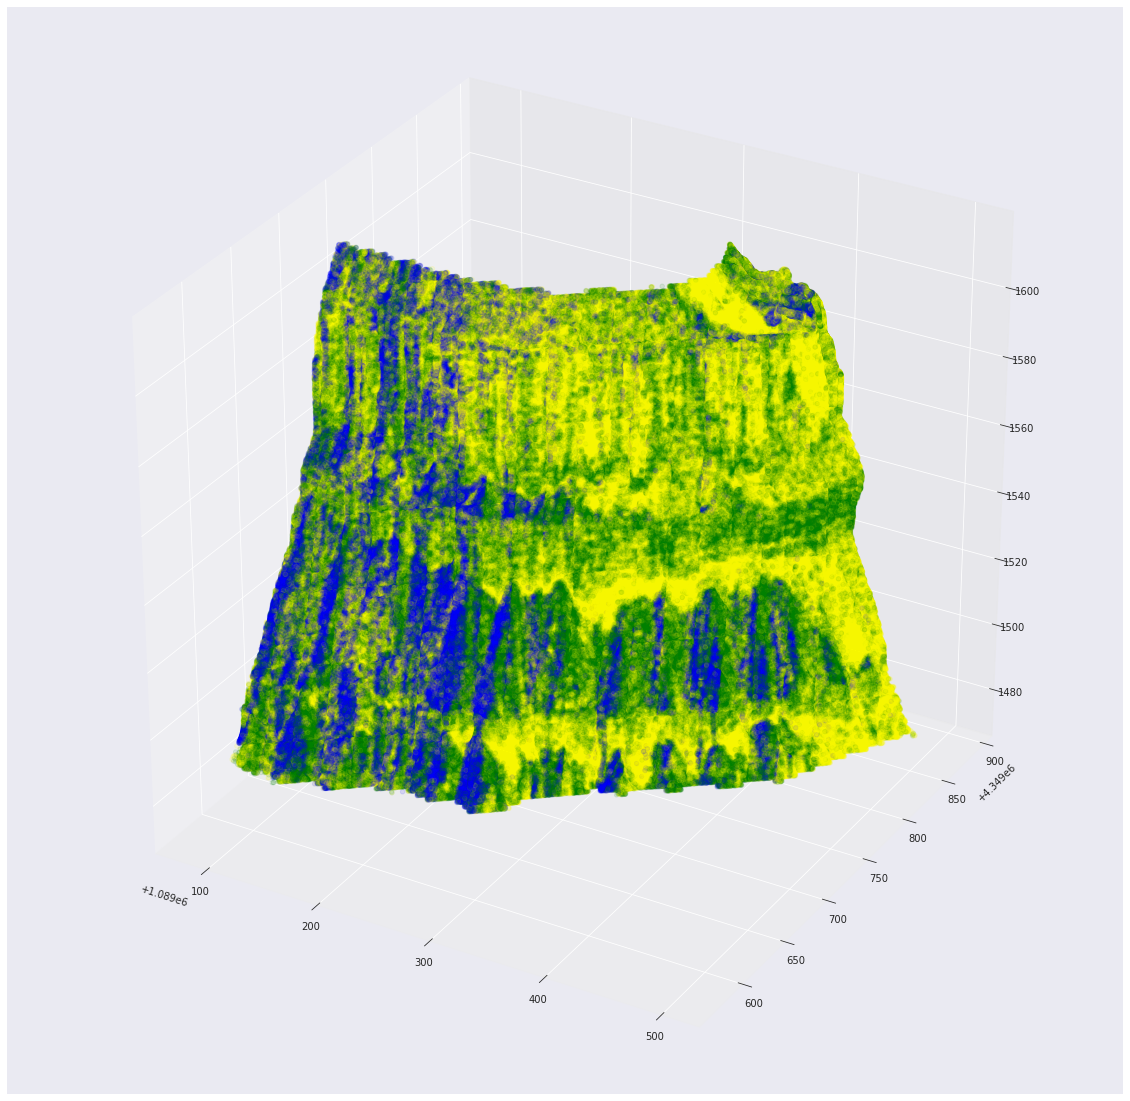

In [75]:
from mpl_toolkits.mplot3d import Axes3D

predictions, _ = rgb_to_classes(pts[:,3:6])
print(predictions.shape)

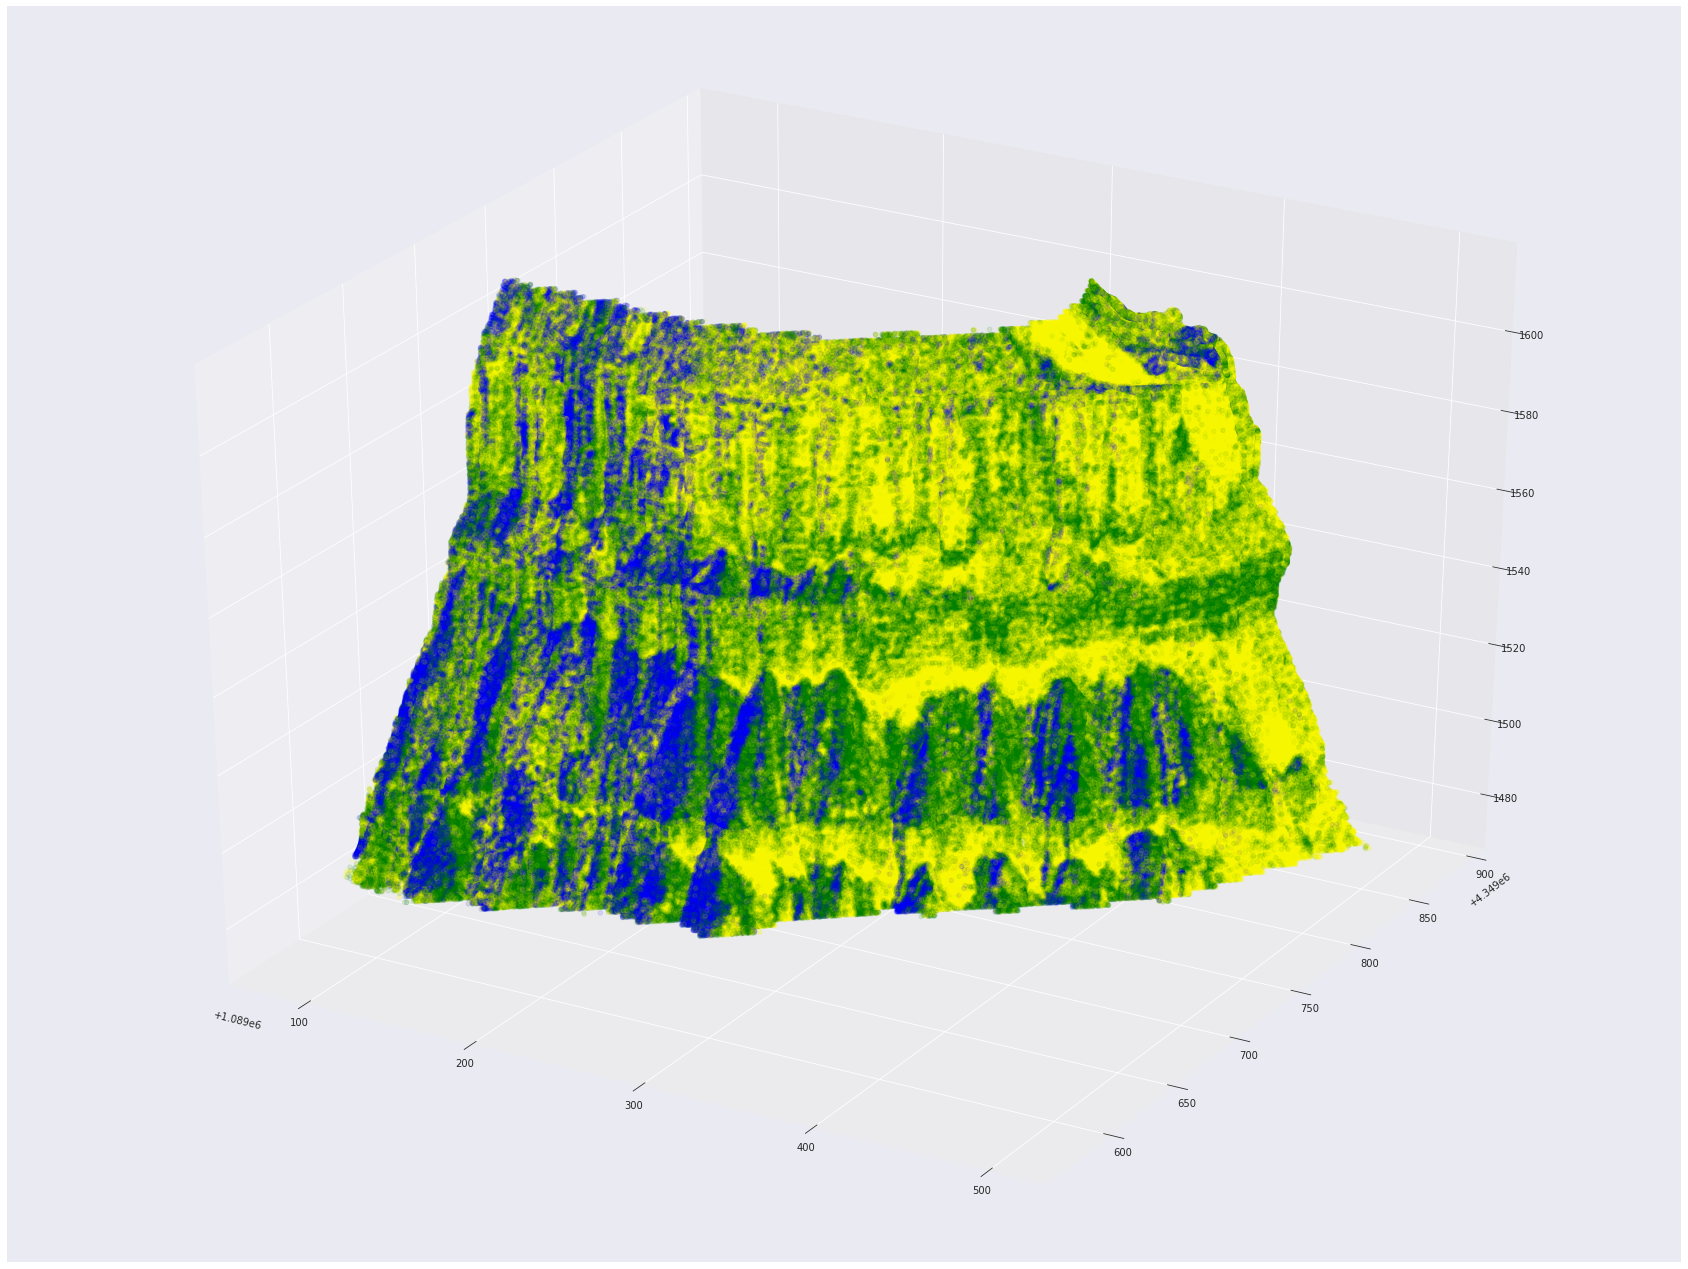

In [76]:
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
ax.scatter(pts[:,0], pts[:,1], pts[:,2], c=predictions, cmap=cmap_classes, alpha=0.1)
plt.show()